In [353]:
# Import libraries

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools 
import numpy as np

## Insurance dataset

In [ ]:
# Read in data
insurance_data = pd.read_csv("insurance.csv")

In [3]:
# View data
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Relationship between BMI and insurance charges

Text(0.5, 1.0, 'Insurance charges vs. BMI for smokers and nonsmokers')

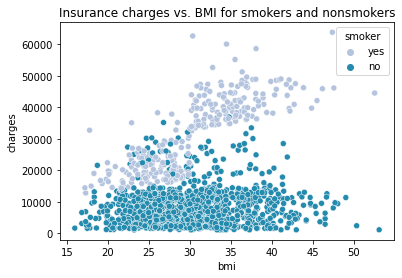

In [82]:
sns.scatterplot(x = insurance_data["bmi"], y = insurance_data["charges"], hue = insurance_data["smoker"], palette = "PuBuGn")

plt.title("Insurance charges vs. BMI for smokers and nonsmokers")

People who are smokers (blue) tend to have higher insurance charges than nonsmokers (orange). 

For smokers, as BMI increases, so do insurance charges. 

For nonsmokers, as BMI increases, insurance charges stay roughly the same.

Text(0.5, 1.0, 'Insurance charges vs. BMI for males and females')

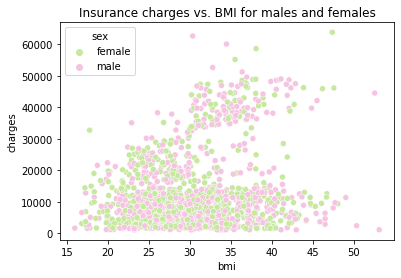

In [81]:
sns.scatterplot(x = insurance_data["bmi"], y = insurance_data["charges"], hue = insurance_data["sex"], palette = "PiYG_r")

plt.title("Insurance charges vs. BMI for males and females")

As BMI increases, the variability of insurance charge increases.

Sex does not seem to have a relationship with BMI and/or insurance charges.

Text(0.5, 1.0, 'Insurance charges vs. BMI by region')

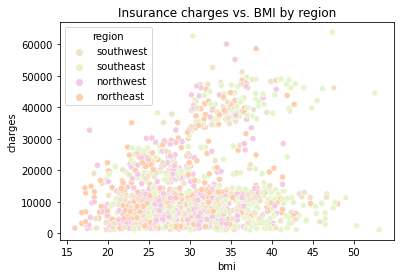

In [80]:
sns.scatterplot(x = insurance_data["bmi"], y = insurance_data["charges"], hue = insurance_data["region"], palette = "Pastel2_r")

plt.title("Insurance charges vs. BMI by region")

As BMI increases, the variability of insurance charge increases.

Region does not seem to have a relationship with BMI and/or insurance charges.

Text(0.5, 1.0, 'Insurance charges vs. BMI by number of children')

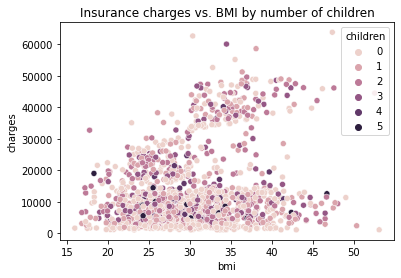

In [15]:
sns.scatterplot(x = insurance_data["bmi"], y = insurance_data["charges"], hue = insurance_data["children"])

plt.title("Insurance charges vs. BMI by number of children")

As BMI increases, the variability of insurance charge increases.

Number of children does not seem to have a relationship with BMI and/or insurance charges.

### Relationship between number of children and insurance charges

Text(0.5, 1.0, 'Insurance charges vs. number of children')

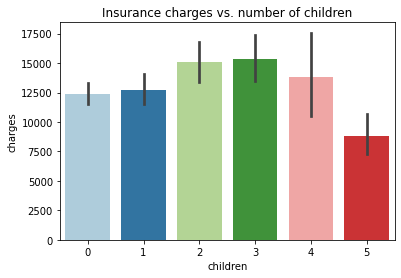

In [79]:
sns.barplot(x = insurance_data["children"], y = insurance_data["charges"], palette = "Paired")

plt.title("Insurance charges vs. number of children")

As number of children increases, insurance charges increase, until a certain point after which insurance charges decrease. 

Specifically, there's little difference in charges between 0 and 1 children or 2 and 3 children. Having 5 children is the cheapest, even cheaper than having 0 children. The charges start decreasing after 3 children.

/Users/paigelee/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 64.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/paigelee/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/paigelee/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 40.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/paigelee/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 29.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Insurance charges vs. number of children')

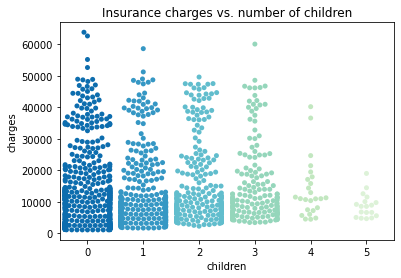

In [78]:
sns.swarmplot(x = insurance_data["children"], y = insurance_data["charges"], palette = "GnBu_r")

plt.title("Insurance charges vs. number of children")

For each number of children, most people pay fewer insurance charges (many points in the base of each distribution), and fewer people pay larger insurance charges (fewer points at the top of each distribution).

In the dataset, most people have 0 children, roughly the same number of people have 1 or 2 children, and fewer people have 3, 4, or 5 children. For the people who have 5 children, the insurance charges are much lower than those of the other numbers of children, but this observation may be difficult to interpret since there are significantly fewer people who have 5 children. 

The difference between this categorical scatter plot and the previous bar plot is that this scatterplot shows how many people are in each group, which is important in the case of the group of people who have 5 children because we're able to see there are a lot fewer people with 5 children, making the charges for this group perhaps not representative.

Text(0.5, 1.0, 'Counts of numbers of children')

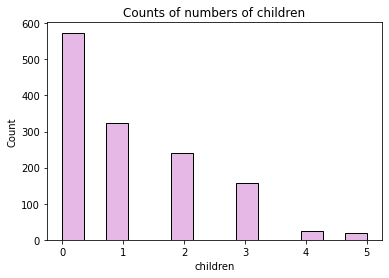

In [77]:
sns.histplot(data = insurance_data, x = "children", color = "plum")

plt.title("Counts of numbers of children")

In this dataset, most people have 0 children, fewer people have 1 child, then 2 children, then 3 children, then 4 children, then 5 children. 

The number of people who have 4 children is as similarly low as the number of people who have 5 children. 

Text(0.5, 1.0, 'Counts of numbers of children')

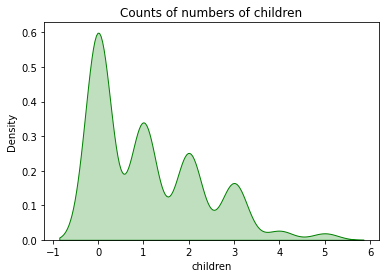

In [76]:
sns.kdeplot(data = insurance_data, x = "children", shade=True, cbar = True, color = "green")

plt.title("Counts of numbers of children")

In this dataset, most people have 0 children, fewer people have 1 child, then 2 children, then 3 children, then 4 children, then 5 children.

The number of people who have 4 children is as similarly low as the number of people who have 5 children.

The only difference between this KDE plot and the previous histogram is that a KDE plot is a smoothed histogram.

### Relationship between age and insurance charges

Text(0.5, 1.0, 'Insurance charges vs. age for males and females')

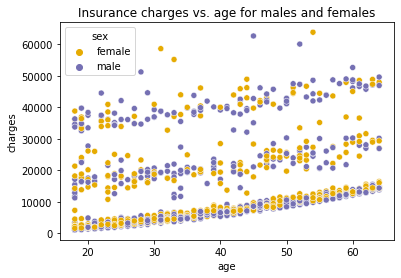

In [72]:
sns.scatterplot(x = insurance_data["age"], y = insurance_data["charges"], hue = insurance_data["sex"], palette = "Dark2_r")

plt.title("Insurance charges vs. age for males and females")

There seems to be three groups of insurance charges, each of which increase steadily as age increases. 

Sex does not seem to be related to age and insurance charges.

Text(0.5, 1.0, 'Insurance charges vs. age for smokers and nonsmokers')

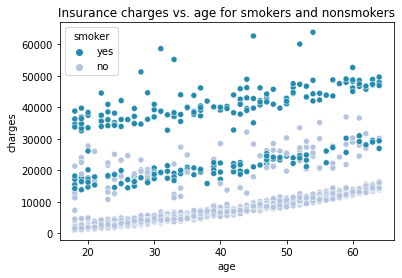

In [83]:
sns.scatterplot(x = insurance_data["age"], y = insurance_data["charges"], hue = insurance_data["smoker"], palette = "PuBuGn_r")

plt.title("Insurance charges vs. age for smokers and nonsmokers")

There seems to be three groups of insurance charges, each of which increase steadily as age increases.

The highest charged of the three groups contains all smokers, the middle charged group contains a mix of smokers and nonsmokers, and the lowest charged group contains only nonsmokers.

Text(0.5, 1.0, 'Insurance charges vs. age by region')

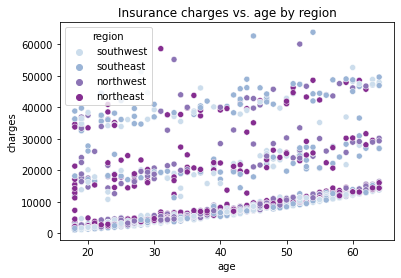

In [71]:
sns.scatterplot(x = insurance_data["age"], y = insurance_data["charges"], hue = insurance_data["region"], palette = "BuPu")

plt.title("Insurance charges vs. age by region")

There seems to be three groups of insurance charges, each of which increase steadily as age increases.

Region does not seem to be related to age and insurance charges.

Text(0.5, 1.0, 'Number of children vs. sex')

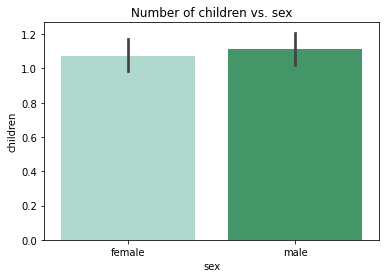

In [67]:
sns.barplot(x = insurance_data["sex"], y = insurance_data["children"], palette = "BuGn")

plt.title("Number of children vs. sex")

Females and males have roughly the same number of children on average.

Text(0.5, 1.0, 'Distribution of ages by sex')

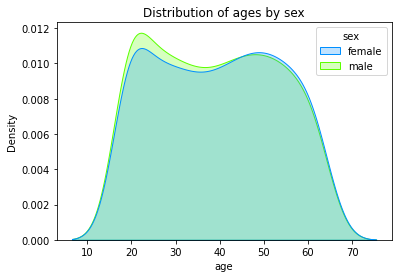

In [66]:
sns.kdeplot(data = insurance_data, x = "age", hue = "sex", shade = True, palette = "gist_rainbow_r")

plt.title("Distribution of ages by sex")

The distribution of males and females in this dataset is roughly the same, although there are a bit more 20 year old males than females.

Text(0.5, 1.0, 'Distribution of charges by sex')

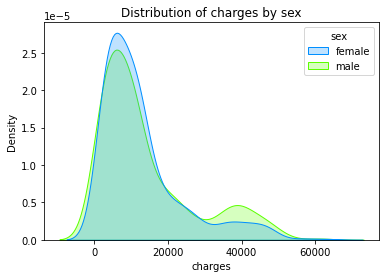

In [64]:
sns.kdeplot(data = insurance_data, x = "charges", hue = "sex", shade = True, palette = "gist_rainbow_r")

plt.title("Distribution of charges by sex")

Both males and females tend to have a majority of people receiving lower charges and a minority of people receiving higher charges.

For the majority receiving lower charges, there are a bit more females than males receiving lower charges.

For the minority receiving higher charges, there are a bit more males than females receiving higher charges.

## Data science salaries dataset

In [84]:
# Read in data
jobs_data = pd.read_csv("ds_salaries.csv")

In [86]:
# Preview data
jobs_data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [90]:
jobs_data["job_title"].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

Text(0, 0.5, 'Salary (in USD)')

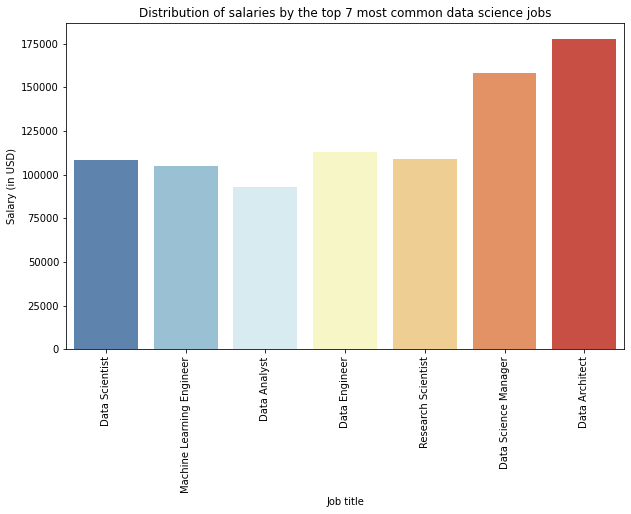

In [365]:
plt.figure(figsize=(10, 6))

subset = jobs_data[
    (jobs_data["job_title"] == "Data Scientist") | 
    (jobs_data["job_title"] == "Data Engineer") |
    (jobs_data["job_title"] == "Data Analyst") |
    (jobs_data["job_title"] == "Machine Learning Engineer") |
    (jobs_data["job_title"] == "Research Scientist") |
    (jobs_data["job_title"] == "Data Science Manager") |
    (jobs_data["job_title"] == "Data Architect")
]


sns.barplot(x = subset["job_title"], y = subset["salary_in_usd"], ci = None, palette = "RdYlBu_r")

plt.xticks(rotation = 90)

plt.title("Distribution of salaries by the top 7 most common data science jobs")

plt.ticklabel_format(style = "plain", axis = "y")

plt.xlabel("Job title")

plt.ylabel("Salary (in USD)")

We filtered the dataset so that only the jobs with at least 10 observations are shown.

From left to right, the number of observations for each job decreases. Data scientist has the most observations, and data architect has the fewest observations.

We made sure to use `salary_in_usd` instead of `salary` to ensure consistent units across observations.

It seems like data scientist, ML engineer, data analyst, data engineer, and research scientist all make roughly around $100,000, while data science manager and data architect make significantly more money.

Text(0.5, -0.25, 'EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level')

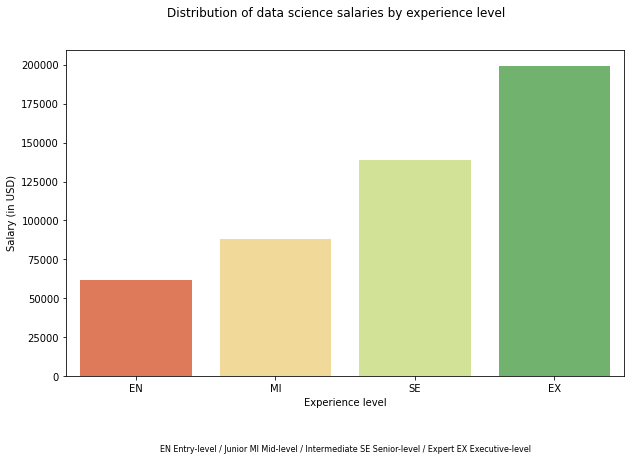

In [367]:
plt.figure(figsize=(10, 6))

order_list = ["EN", "MI", "SE", "EX"]

sns.barplot(x = jobs_data["experience_level"], y = jobs_data["salary_in_usd"], ci = None, palette = "RdYlGn", order = order_list)

plt.suptitle("Distribution of data science salaries by experience level")

plt.xlabel("Experience level")

plt.ylabel("Salary (in USD)")

plt.title("EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level",
         y = -0.25, fontsize = 8)

Text(0.8, 0.4, 'Small: <50 employees \n Medium: 50-250 employees \n Large: >250 employees')

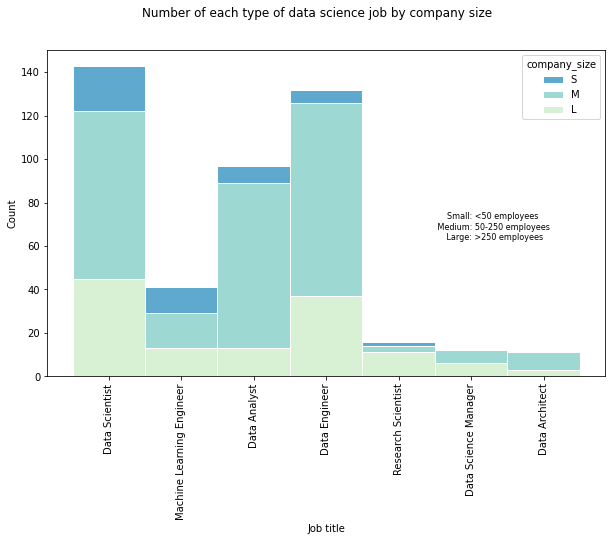

In [474]:
plt.figure(figsize=(10, 6))

hue_order = ["S", "M", "L"]

sns.histplot(data = subset, x = "job_title", hue = "company_size", multiple = "stack", hue_order = hue_order, palette = "GnBu_r", edgecolor = "white")

plt.suptitle("Number of each type of data science job by company size")

plt.xticks(rotation = 90)

plt.xlabel("Job title")

#plt.legend(labels = ["Small", "Medium", "Large"], title = "Company size")

plt.title("Small: <50 employees \n Medium: 50-250 employees \n Large: >250 employees",
         y = 0.4, x = 0.8, fontsize = 8)

Text(0.8, 0.4, 'EN: Entry-level \n MI: Junior Mid-level \n SE: Intermediate Senior-level \n EX: Expert Executive-level')

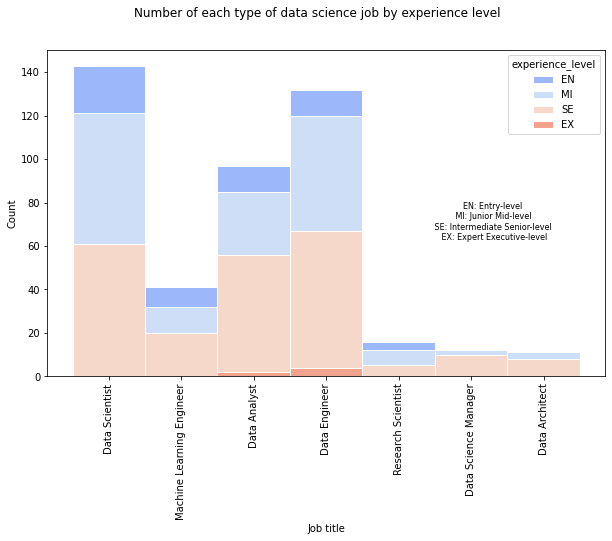

In [475]:
plt.figure(figsize=(10, 6))

hue_order = ["EN", "MI", "SE", "EX"]

sns.histplot(data = subset, x = "job_title", hue = "experience_level", multiple = "stack",  palette = "coolwarm", edgecolor = "white", hue_order = hue_order)

plt.suptitle("Number of each type of data science job by experience level")

plt.xticks(rotation = 90)

plt.xlabel("Job title")

#plt.legend(labels = ["EN", "MI", "SE", "EX"], title = "Experience level")

plt.title("EN: Entry-level \n MI: Junior Mid-level \n SE: Intermediate Senior-level \n EX: Expert Executive-level",
         y = 0.4, x = 0.8, fontsize = 8)

In [349]:
subset2 = subset[["work_year", "job_title", "salary_in_usd"]]

avrg_salaries = subset2.groupby(["work_year", "job_title"]).mean()

avrg_salaries = avrg_salaries.unstack()

#sns.lineplot(data = avrg_salaries, label = "job_title")

#plt.xticks(rotation = 90)

avrg_salaries = pd.DataFrame({
    "Data Scientist": [85970.523810, 70671.733333, 136172.090909],
    "Machine Learning Engineer": [125389.800000, 74611.222222, 129451.944444],
    "Data Analyst": [45547.285714, 79505.411765, 100550.739726], 
    "Data Engineer": [88162.000000, 83202.531250, 126375.696629],
    "Research Scientist": [246000.0, 83003.6, 105569.0],
    "Data Science Manager": [190200.0, 143126.5, 170196.6]
})

avrg_salaries.index = ["2020", "2021", "2022"]

avrg_salaries

,Data Scientist,Machine Learning Engineer,Data Analyst,Data Engineer,Research Scientist,Data Science Manager
2020,85970.523810,125389.800000,45547.285714,88162.000000,246000.0,190200.0
2021,70671.733333,74611.222222,79505.411765,83202.531250,83003.6,143126.5
2022,136172.090909,129451.944444,100550.739726,126375.696629,105569.0,170196.6


In [350]:
avrg_salaries = pd.melt(avrg_salaries)

input_array = pd.array([2020, 2021, 2022, 2020, 2021, 2022, 2020, 2021, 2022, 2020, 2021, 2022, 2020, 2021, 2022, 2020, 2021, 2022])

avrg_salaries = pd.DataFrame(data = {"Year": input_array, "Job title": avrg_salaries["variable"], "Salary": avrg_salaries["value"]})

avrg_salaries

,Year,Job title,Salary
0,2020,Data Scientist,85970.523810
1,2021,Data Scientist,70671.733333
2,2022,Data Scientist,136172.090909
3,2020,Machine Learning Engineer,125389.800000
4,2021,Machine Learning Engineer,74611.222222
5,2022,Machine Learning Engineer,129451.944444
6,2020,Data Analyst,45547.285714
7,2021,Data Analyst,79505.411765
8,2022,Data Analyst,100550.739726
9,2020,Data Engineer,88162.000000


Text(0.5, 1.0, 'Average salary for the top 6 most common data science jobs 2020-2022')

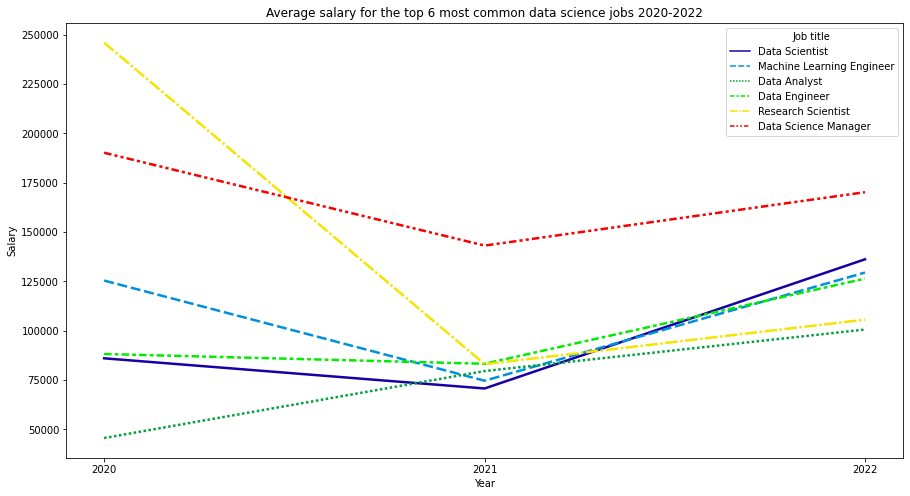

In [388]:
plt.figure(figsize=(15, 8))

sns.lineplot(data = avrg_salaries, x = "Year", y = "Salary", hue = "Job title", style = "Job title", linewidth = 2.5, palette = "nipy_spectral")

plt.xticks(np.arange(2020, 2023, 1.0))

plt.title("Average salary for the top 6 most common data science jobs 2020-2022")

Text(0.85, 0.4, '0: No remote work (<20%) \n 50: Partially remote \n 100: Fully remote (>80%)')

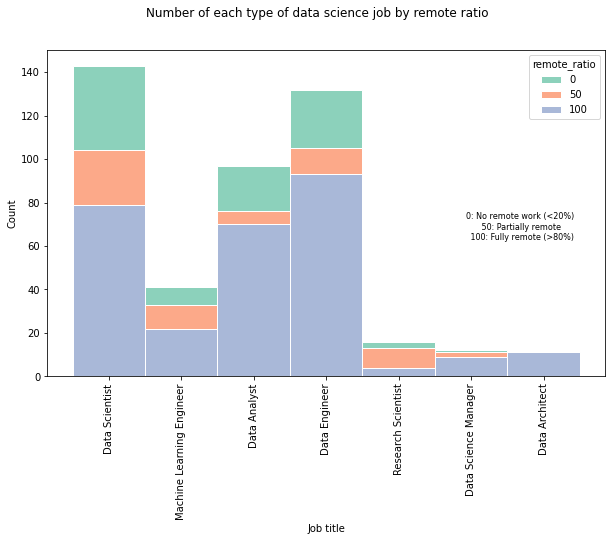

In [476]:
plt.figure(figsize=(10, 6))

hue_order = [0, 50, 100]

sns.histplot(data = subset, x = "job_title", hue = "remote_ratio", multiple = "stack",  palette = "Set2", edgecolor = "white", hue_order = hue_order)

plt.suptitle("Number of each type of data science job by remote ratio")

plt.xticks(rotation = 90)

plt.xlabel("Job title")

#plt.legend(labels = [0, 50, 100], title = "Remote ratio")

plt.title("0: No remote work (<20%) \n 50: Partially remote \n 100: Fully remote (>80%)",
         y = 0.4, x = 0.85, fontsize = 8)

In [431]:
jobs_data["company_location"].value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

In [432]:
subset3 = jobs_data[
    (jobs_data["company_location"] == "US") | 
    (jobs_data["company_location"] == "GB") |
    (jobs_data["company_location"] == "CA") |
    (jobs_data["company_location"] == "DE") |
    (jobs_data["company_location"] == "IN") |
    (jobs_data["company_location"] == "FR") |
    (jobs_data["company_location"] == "ES") |
    (jobs_data["company_location"] == "GR")
]

Text(0.5, -0.25, 'US: United States, GB: United Kingdom, CA: Canada, DE: Germany, IN: India, FR: France, ES: Spain, GR: Greece')

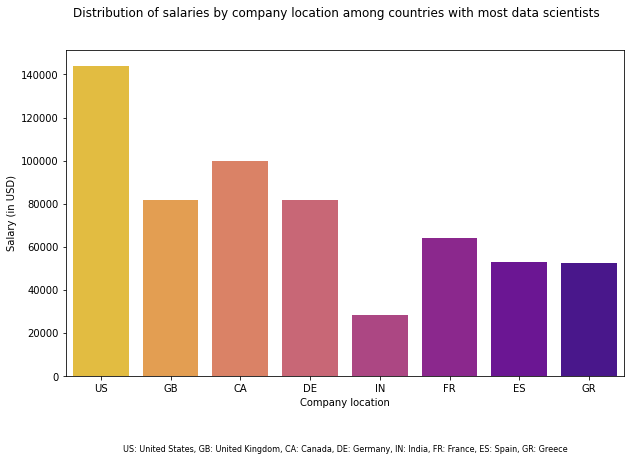

In [444]:
plt.figure(figsize=(10, 6))

order_list = ["US", "GB", "CA", "DE", "IN", "FR", "ES", "GR"]

sns.barplot(x = subset3["company_location"], y = subset3["salary_in_usd"], ci = None, order = order_list, palette = "plasma_r")

plt.suptitle("Distribution of salaries by company location among countries with most data scientists")

plt.xlabel("Company location")

plt.ylabel("Salary (in USD)")

plt.title("US: United States, GB: United Kingdom, CA: Canada, DE: Germany, IN: India, FR: France, ES: Spain, GR: Greece",
         y = -0.25, fontsize = 8)

In [456]:
subset4 = jobs_data[
    ((jobs_data["company_location"] == "US") | 
    (jobs_data["company_location"] == "GB") |
    (jobs_data["company_location"] == "CA") |
    (jobs_data["company_location"] == "DE") |
    (jobs_data["company_location"] == "IN") |
    (jobs_data["company_location"] == "FR") |
    (jobs_data["company_location"] == "ES") |
    (jobs_data["company_location"] == "GR")) &
    ((jobs_data["job_title"] == "Data Scientist") | 
    (jobs_data["job_title"] == "Data Engineer") |
    (jobs_data["job_title"] == "Data Analyst") |
    (jobs_data["job_title"] == "Machine Learning Engineer") |
    (jobs_data["job_title"] == "Research Scientist") |
    (jobs_data["job_title"] == "Data Science Manager") |
    (jobs_data["job_title"] == "Data Architect"))
]

Text(0.85, 0.25, 'US: United States \n GB: United Kingdom \n CA: Canada \n DE: Germany \n IN: India \n FR: France \n ES: Spain \n GR: Greece')

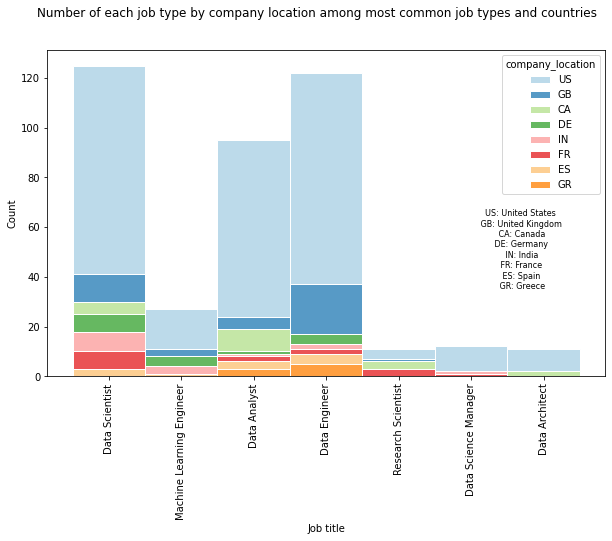

In [492]:
plt.figure(figsize=(10, 6))

order_list = ["US", "GB", "CA", "DE", "IN", "FR", "ES", "GR"]

sns.histplot(data = subset4, x = "job_title", hue = "company_location", multiple = "stack",  palette = "Paired", edgecolor = "white", hue_order = order_list)

plt.xticks(rotation = 90)

plt.suptitle("Number of each job type by company location among most common job types and countries")

plt.xlabel("Job title")

plt.title("US: United States \n GB: United Kingdom \n CA: Canada \n DE: Germany \n IN: India \n FR: France \n ES: Spain \n GR: Greece",
         y = 0.25, x = 0.85, fontsize = 8)